<a href="https://colab.research.google.com/github/italo2403/B.I/blob/main/Aula_OLAP_OLTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy

In [ ]:
import pandas as pd
import numpy as np

# Dimensões
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
produtos = ['Produto A', 'Produto B', 'Produto C']
regioes = ['Norte', 'Sul', 'Leste', 'Oeste']

# Geração de dados aleatórios
dados = {
    'Data': np.random.choice(datas, size=1000),
    'Produto': np.random.choice(produtos, size=1000),
    'Região': np.random.choice(regioes, size=1000),
    'Vendas': np.random.randint(10, 1000, size=1000)
}

df = pd.DataFrame(dados)

#Exibe as primeiras linhas do dataframe
df.head()

,Data,Produto,Região,Vendas
0,2023-12-06,Produto A,Leste,542
1,2023-11-29,Produto B,Oeste,396
2,2023-02-13,Produto C,Leste,233
3,2023-04-10,Produto C,Sul,714
4,2023-06-18,Produto B,Sul,738


In [ ]:
# Agregação de vendas por mês e produto
df['Mês'] = df['Data'].dt.to_period('M')
vendas_mensais = df.groupby(['Mês', 'Produto'])['Vendas'].sum().reset_index()
print("Vendas Mensais Agregadas:\n", vendas_mensais)

Vendas Mensais Agregadas:
         Mês    Produto  Vendas
0   2023-01  Produto A   13061
1   2023-01  Produto B   14998
2   2023-01  Produto C   17223
3   2023-02  Produto A   19402
4   2023-02  Produto B   13435
5   2023-02  Produto C   13337
6   2023-03  Produto A   11738
7   2023-03  Produto B   15416
8   2023-03  Produto C   11106
9   2023-04  Produto A   10215
10  2023-04  Produto B   17078
11  2023-04  Produto C   14659
12  2023-05  Produto A   15698
13  2023-05  Produto B   20837
14  2023-05  Produto C   12049
15  2023-06  Produto A   17996
16  2023-06  Produto B   13818
17  2023-06  Produto C   13443
18  2023-07  Produto A   12421
19  2023-07  Produto B   16043
20  2023-07  Produto C   17402
21  2023-08  Produto A   14138
22  2023-08  Produto B   11143
23  2023-08  Produto C   16386
24  2023-09  Produto A   15656
25  2023-09  Produto B   11043
26  2023-09  Produto C   12004
27  2023-10  Produto A   18004
28  2023-10  Produto B   12407
29  2023-10  Produto C   14744
30  2023-11 

In [ ]:
# Selecionar vendas da região Sul
vendas_sul = df[df['Região'] == 'Sul']
print("\nVendas na Região Sul:\n", vendas_sul.head())


Vendas na Região Sul:
          Data    Produto Região  Vendas      Mês
3  2023-04-10  Produto C    Sul     714  2023-04
4  2023-06-18  Produto B    Sul     738  2023-06
11 2023-11-09  Produto B    Sul     162  2023-11
15 2023-12-28  Produto C    Sul     702  2023-12
22 2023-07-04  Produto B    Sul     232  2023-07


In [ ]:
# Criar uma tabela dinâmica de vendas por região e produto
tabela_dinamica = pd.pivot_table(df, values='Vendas', index='Região', columns='Produto', aggfunc=np.sum)
print("\nTabela Dinâmica de Vendas:\n", tabela_dinamica)


Tabela Dinâmica de Vendas:
 Produto  Produto A  Produto B  Produto C
Região                                  
Leste        47197      39927      52666
Norte        41325      48400      33880
Oeste        44185      46549      39525
Sul          39151      39143      39151


<ipython-input-5-af78309d3f9f>:2: FutureWarning: The provided callable <function sum at 0x7a6299d69a80> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  tabela_dinamica = pd.pivot_table(df, values='Vendas', index='Região', columns='Produto', aggfunc=np.sum)


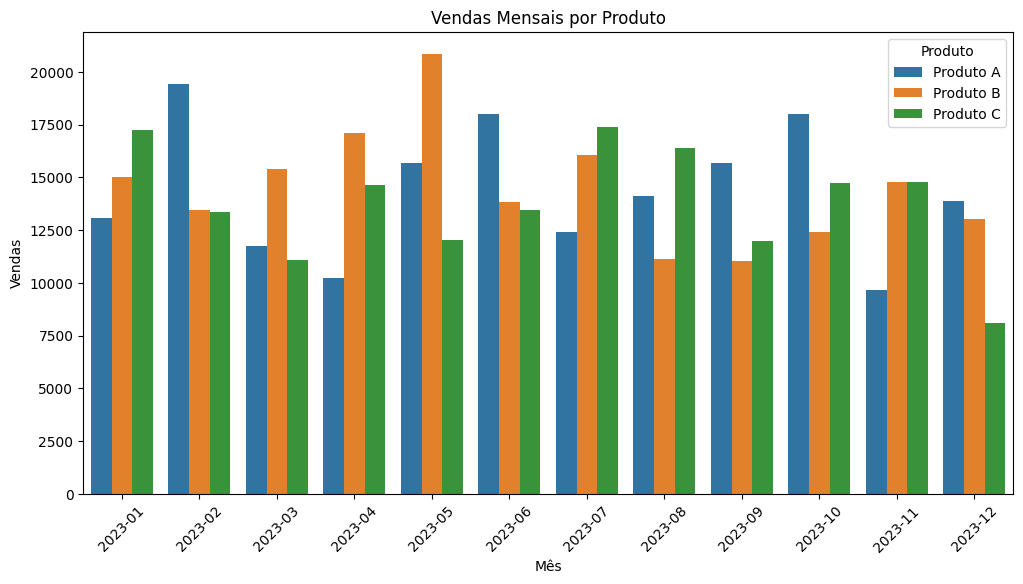

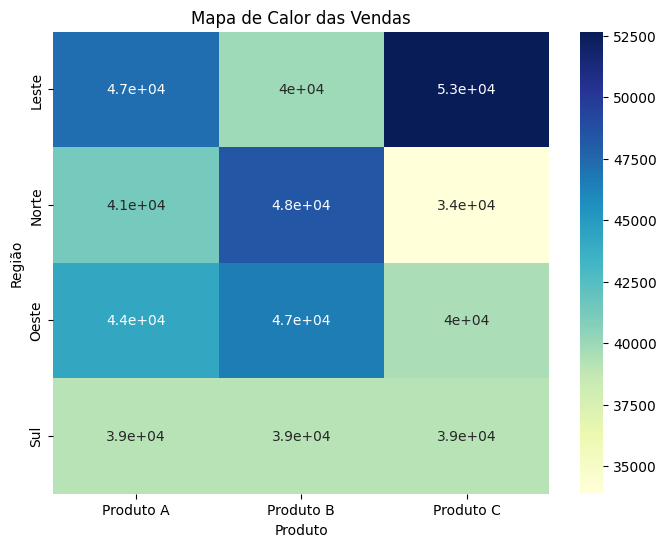

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de barras das vendas mensais
plt.figure(figsize=(12, 6))
sns.barplot(x='Mês', y='Vendas', hue='Produto', data=vendas_mensais)
plt.title('Vendas Mensais por Produto')
plt.xticks(rotation=45)
plt.show()

# Mapa de calor da tabela dinâmica
plt.figure(figsize=(8, 6))
sns.heatmap(tabela_dinamica, annot=True, cmap='YlGnBu')
plt.title('Mapa de Calor das Vendas')
plt.show()